In [1]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../Datos/Datos_Modelo_2/Modelo_2_CL_0.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,5175.171,36.402569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,389.355572,376.016944,387.974849,557.550307,590.015969,315.266849,601.339346
1,2892.510,36.188641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,328.616717,294.551347,331.837571,560.247600,617.748325,317.957078,217.412934
2,2862.675,35.674493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,398.159796,383.684761,384.386158,550.723353,604.896927,316.184040,217.338230
3,1822.080,35.570941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,306.486498,385.295329,394.028902,472.155097,495.166822,312.282376,214.655783
4,5083.960,34.484046,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,296.790800,255.967758,296.790800,138.996303,92.956661,317.957078,217.412934


In [3]:
df.describe()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
count,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000
mean,290.949976,0.882865,0.150435,0.053338,0.195313,0.600914,0.529586,0.302329,0.168085,0.078961,0.298731,0.051782,0.570526,290.716811,290.856904,290.895516,290.915204,290.434085,291.010671,290.660310
std,611.266038,2.667503,0.357506,0.224712,0.396451,0.489722,0.499136,0.459278,0.373951,0.269685,0.457713,0.221592,0.495013,95.723287,68.880546,71.908386,186.669401,267.178435,59.457224,161.815981
min,0.444000,-0.341963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.335223,181.484663,181.484663,137.541249,26.375065,45.352259,214.655783
25%,32.400000,-0.229781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,247.136667,260.132758,221.986720,138.910688,76.640177,312.282376,217.338230
50%,93.723600,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,296.790800,288.763633,300.569940,141.168329,125.956753,315.266849,219.612001
75%,283.860000,0.770219,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,345.361881,312.428404,331.837571,480.646696,509.812369,317.957078,220.178440
max,22638.480000,36.402569,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1619.100000,479.424068,394.028902,560.247600,1048.379970,318.259491,1019.446060


In [4]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [5]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[447.60407226],
       [695.97970889],
       [ -8.43556881]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[251.50559132],
       [399.99625236],
       [841.14814315]])

In [10]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [11]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.571510,144.960322,170255.144893,412.619855
test,0.702294,138.871313,94746.249576,307.808787


Text(0, 0.5, 'Predicciones (y_test_pred)')

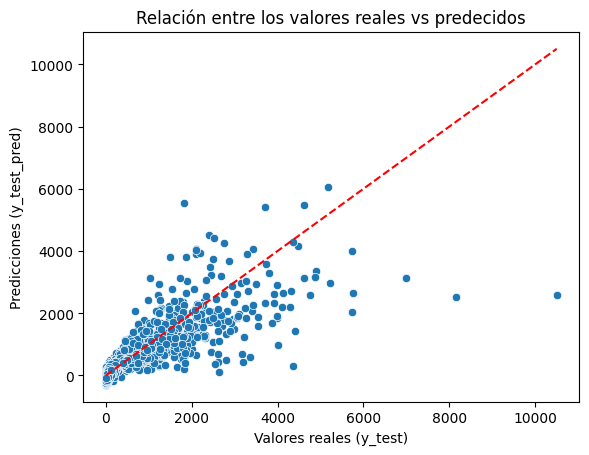

In [12]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [13]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [14]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [15]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [16]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [17]:
params_arbol_5 = {
    'max_depth': [5],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [17,20,22],
    'max_leaf_nodes': [38,40,42]
}

In [18]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5], 'max_leaf_nodes': [38, 40, 42],
                         'min_samples_leaf': [17, 20, 22],
                         'min_samples_split': [45, 50, 55]},
             scoring='neg_mean_squared_error')

In [19]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [20]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=38, min_samples_leaf=20,
                      min_samples_split=50)

In [21]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [22]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [23]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.646909,108.126271,140296.266992,374.561433
test,0.792154,103.235744,66148.066904,257.192665


In [24]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.217765,0.125248,0.005019,0.000833,5,40,20,50,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-115976.389867,-108946.058445,-75535.71015,-402949.902837,-69082.072428,-154498.026745,125553.308002,1
22,0.206931,0.112390,0.028255,0.046670,5,42,20,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-115976.389867,-108946.058445,-75535.71015,-402949.902837,-69082.072428,-154498.026745,125553.308002,1
4,0.360858,0.164766,0.017139,0.014092,5,38,20,50,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-115976.389867,-108946.058445,-75535.71015,-402949.902837,-69082.072428,-154498.026745,125553.308002,1
1,0.363271,0.100048,0.058807,0.064056,5,38,17,50,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-116496.549305,-108946.058445,-75566.41325,-403005.312068,-69082.072428,-154619.281099,125539.616305,4
19,0.309829,0.014757,0.005469,0.000853,5,42,17,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-116496.549305,-108946.058445,-75566.41325,-403005.312068,-69082.072428,-154619.281099,125539.616305,4
10,0.184276,0.110794,0.047346,0.049087,5,40,17,50,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-116496.549305,-108946.058445,-75566.41325,-403005.312068,-69082.072428,-154619.281099,125539.616305,4
12,0.157112,0.084695,0.050117,0.055090,5,40,20,45,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-115976.389867,-109700.529900,-75535.71015,-402949.902837,-69082.072428,-154648.921036,125498.912994,7
3,0.390939,0.113335,0.074108,0.065093,5,38,20,45,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-115976.389867,-109700.529900,-75535.71015,-402949.902837,-69082.072428,-154648.921036,125498.912994,8
21,0.233547,0.139628,0.006634,0.002074,5,42,20,45,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-115976.389867,-109700.529900,-75535.71015,-402949.902837,-69082.072428,-154648.921036,125498.912994,8
18,0.324699,0.013803,0.005087,0.000959,5,42,17,45,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-116496.549305,-109700.529900,-75566.41325,-403005.312068,-69082.072428,-154770.175390,125485.069555,10


In [25]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
13,5,40,20,50,-154498.026745
22,5,42,20,50,-154498.026745
4,5,38,20,50,-154498.026745
1,5,38,17,50,-154619.281099
19,5,42,17,50,-154619.281099
10,5,40,17,50,-154619.281099
12,5,40,20,45,-154648.921036
3,5,38,20,45,-154648.921036
21,5,42,20,45,-154648.921036
18,5,42,17,45,-154770.175390


In [26]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [27]:
df_rmse_prof

,param_max_depth,MSE
0,5,394.046429


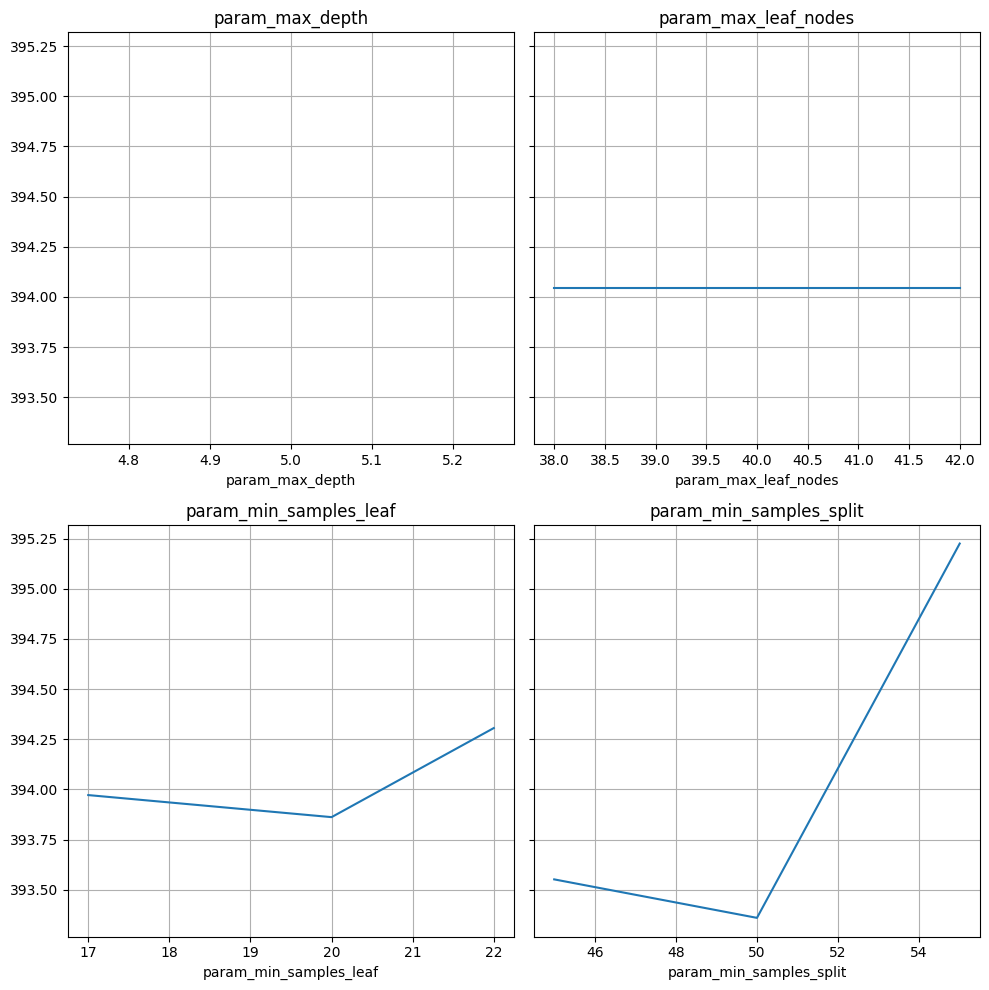

In [28]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [29]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

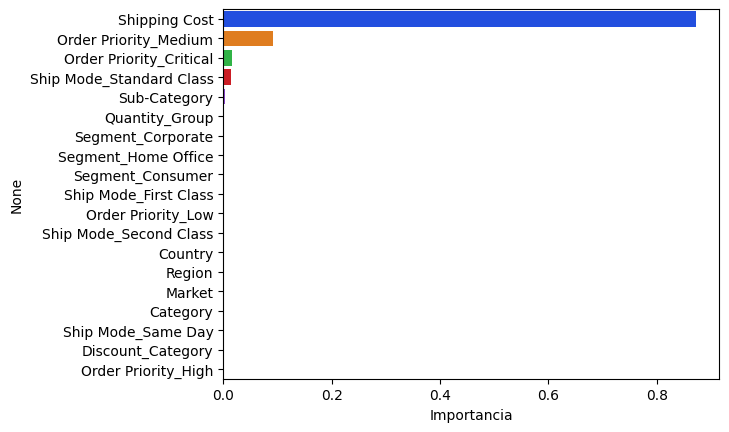

In [30]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [31]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [32]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=16, max_leaf_nodes=50,
                      min_samples_leaf=20, min_samples_split=45,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [33]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.678461,94.958088,127759.420224,357.434498
test,0.819278,92.114438,57515.702637,239.824316


### Random Distinto

In [ ]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [15,18,20,22],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [42,45,28,50],
    'min_samples_leaf': [19,20,21], 
    'max_leaf_nodes': [50]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=15, max_leaf_nodes=50,
                      min_samples_leaf=19, min_samples_split=28,
                      n_estimators=300, random_state=42)

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.829747,87.422319,53714.040965,231.762898
test,0.842475,85.596408,43471.579256,208.498391


## Gradient Booster

In [ ]:
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
modelo_final_gb

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=20,
                          min_samples_split=100, n_estimators=115,
                          random_state=42)

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.861282,82.884382,43764.700669,209.200145
test,0.859297,81.370597,38829.434627,197.051858


Visto bueno

## XGB

In [ ]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [ ]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.765056,121.092807,74123.669826,272.256625
test,0.782358,116.982186,60062.045790,245.075592
